# Bias-Variance Tradeoff: Classification (11 points)

In our lecture, we talked the bias-variance tradeoff in a regression case, where we found that a regression model is the one that can find a tradeoff between the **bias** between the expected model and the Bayes predictor and the **variance** between the expected model and the model trained on one specific training set. 

In this assignment, we aim to study a similar tradeoff in a classification case. Specifically, we will use the SVM model with a RBF kernel and study how the model behaves with different $\gamma$'s. 

The high-level idea of this assignment is the exactly the same as the one discussed in our lecture. Please review the **bias-variance tradeoff** for more details. 

**Submission instruction**

- Rename this file with your computingID, as [ComputingID]-hw02.ipynb
- Please keep all the outputs in this notebook for grading

In [1]:
# Necessary packages

import numpy as np
from numpy import random 
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tqdm import tqdm
%matplotlib inline

## 1. Data Generation (3 points)

In the `generate_data()` function, please implement the data generation process with the following requirements. 

For a given number of sample specified by `n_sample`, the examples are generated from the Gaussian distribution with specific mean and variance. 

- 50% examples are generated from the Gaussian distribution with mean as $[0,0]$ and variance as $[[1,0],[0,1]]$, and labeled as POSITIVE
- 25% examples are generated from the Gaussian distribution with mean as $[2,2]$ and variance as $[[2,0],[0,2]]$, and labeled as NEGATIVE
- 25% examples are generated from the Gaussian distribution with mean as $[2,-1]$ and variance as $[[0.5,0],[0,0.5]]$, and labeled as NEGATIVE

For each component, you can use the function [multivariate_normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html) from `numpy` for sampling. 

In [2]:
# Data generation (not the prettiest function but it gets the job done)

def generate_data(n_sample=100):
    pos1_x = random.multivariate_normal([0,0],[[1,0],[0,1]], ((int(n_sample/2),1)))
    pos1_y = np.full((int(n_sample/2),1),1)
    pos1 = np.append(pos1_x.squeeze(), pos1_y, axis = 1)
    neg1_x = random.multivariate_normal([2,2],[[2,0],[0,2]], ((int(n_sample/4),1)))
    neg1_y = np.full((int(n_sample/4),1),-1)
    neg1 = np.append(neg1_x.squeeze(), neg1_y, axis = 1)
    neg2_x = random.multivariate_normal([2,-1],[[0.5,0],[0,0.5]], ((int(n_sample/4),1)))
    neg2_y = np.full((int(n_sample/4),1),-1)
    neg2 = np.append(neg2_x.squeeze(), neg2_y, axis = 1)
    neg = np.append(neg1,neg2, axis= 0)
    data = np.append(pos1,neg, axis=0)
    X = data[:,:2]
    y = data[:,2]
    return X, y


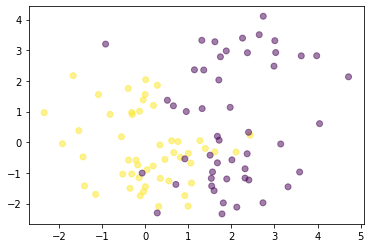

In [3]:
# Run the following code to test your implementation
X_beta, y_beta = generate_data()
plt.scatter(X_beta[:, 0], X_beta[:, 1], c=y_beta, alpha=0.5)

### 1.1 Generate Test Data

Computing the true error in this case is much more compliciated than the one-dimensional case as illustrated in our lectures. Therefore, we are going to use an alternative method for approximating the true error: the following code will generate a large set of examples (3K) from the data generation function that you implemented before. We are going to use the same test data for all the following evaluation. 

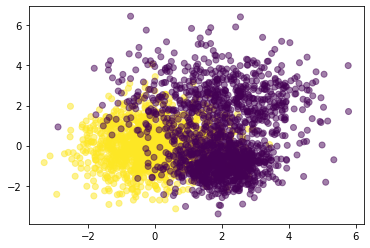

In [4]:
# Plot the test set, which can be used to approximate the ground-truth distribution
X_test, y_test = generate_data(n_sample=3000)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5)

## 2. Training SVMs with Generated Data (3 points)

In this section, we will generate training data from the ground-truth data distribution, and train a SVM classifier with each specific training set.

In the `train()` function, for each iteration $n$, please implement the components:

1. Generate training data
2. Training a model
3. Test it on (X_test, y_test)
4. Attach the trained classifier to the list clfs, and the accuracy number to the list accs

As you can see, the function will also calcuate the mean of the variance of prediction accuracies, and return the list of classifiers `clfs` for further use. 

In [5]:
def train(N=20, gamma=1.0):
    clfs, accs = [], []
    for n in tqdm (range (N), desc="Training models ..."):
        # -----------------------------------
        # TODO: for each iteration n
        # generate the data within the loop
        X_train, y_train = generate_data()
        clf = SVC(kernel = 'rbf', gamma = gamma)
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        acc = sklearn.metrics.accuracy_score(y_test, predictions)
        clfs.append(clf)
        accs.append(acc)
        # ------------------------------------
    print("The mean accuracy: {} and its variance: {}".format(np.mean(accs), np.var(accs)))
    return clfs

In [6]:
# Run the following line to test the function before moving forward
x = train()

Training models ...: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:00<00:00, 65.95it/s]

The mean accuracy: 0.85645 and its variance: 5.2469722222222126e-05


### 2.1 The Bayes predictor

Similar to the regression case, with the ground-truth data distribution, we can calculate the decision boundary given by the Bayes predictor. Although in this case, finding the analystical solution is compliciated, we are going to a numeric method for finding the decision boundary. 

In [7]:
# This code is ready to use

from scipy.stats import multivariate_normal

class Bayes_Predictor(object):
    def __init__(self):
        pass

    def predict(self, x):
        '''
        x - inputs
        '''
        pos = multivariate_normal([0,0], [[1,0],[0,1]])
        neg1 = multivariate_normal([2,2], [[2,0],[0,2]])
        neg2 = multivariate_normal([2,-2], [[0.5,0],[0,0.5]])
        pos_val = pos.pdf(x)
        neg1_val = neg1.pdf(x)
        neg2_val = neg2.pdf(x)
        # print(pos_val)
        # print(neg1_val)
        # print(neg2_val)
        labels = np.all([np.greater(pos_val, neg1_val), np.greater(pos_val, neg2_val)], axis=0)
        # print(labels)
        return labels


## 3. Plot Decision Boundaries

This is a function that is ready to use for drawing decision boundaries. It is **ready** to use. 

Note that, the first argument of `plot_decision_boundary` is a list of classification model. If you only have one classification model, then you need to put it in a list.

[Reference](https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot)

In [8]:
# This code is ready to use

def plot_decision_boundary(clfs, X_test, color='lightgray'):
    '''
    clfs - a list of classification models
    X_test - the inputs of the TEST data 
             (it requires the inputs only for determining the range of the input space)
    color - the color of the decision boundary
    '''
    h = .02  # step size in the mesh
    x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

    for n in tqdm(range(len(clfs)), desc="Plot decision boundaries ..."):
        clf = clfs[n]
        Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)
        plt.contour(xx1, xx2, Z, colors=color)
    

## 4. Put All Together (5 points)

The following code will put all functions together to draw 

### 4.1 Training SVMs with $\gamma=0.01$ (2 points)

With $\gamma=0.01$, we are going to visualize how the decision boundaries look like with different copies of training data. 

Please implement the following components with the functions that you defined before

- Use `train()` to train 10 different SVM models
- Plot the decision boundary of each SVM using `plot_decision_boundary`
- Use the Bayes predictor defined in the `Bayes_Predictor` class and draw its decision boundary using `plot_decision_boundary`

Please **keep all outputs** for grading.

Training models ...: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:00<00:00, 53.45it/s]


The mean accuracy: 0.8447333333333333 and its variance: 2.7617777777777916e-05


Plot decision boundaries ...: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 11.12it/s]


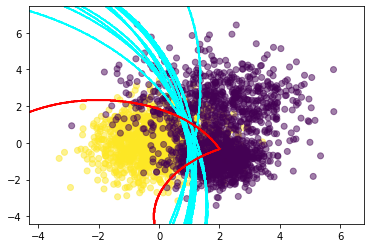

In [9]:
# Gamma: 0.01

# Setting the hyperparameters of our SVM model
N= 10
gamma=0.01

# plotting the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5)

# making a list for the bayes predictor to be plotted with our decision boundary plotting function
b = []
b.append(Bayes_Predictor())

# Training a list of SVM models and plot their decision boundaries
model_g_low = train(N, gamma)

#plotting decision boundaries of SVM models
plot_decision_boundary(model_g_low, X_test, 'cyan')

# Plotting the decision boundary of the Bayes predictor
plot_decision_boundary(b, X_test,'red')

### 4.2 Training models with other $\gamma$ (1 point)

Now, let's train the models with two other $\gamma$'s using the following two code blocks

- $\gamma = 1.0$
- $\gamma = 10.0$

You can copy and paste the code from the previous block. And keep **all outputs** for grading. 

Training models ...: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:00<00:00, 67.48it/s]


The mean accuracy: 0.8548333333333333 and its variance: 0.00012080555555555579


Plot decision boundaries ...: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 10.63it/s]


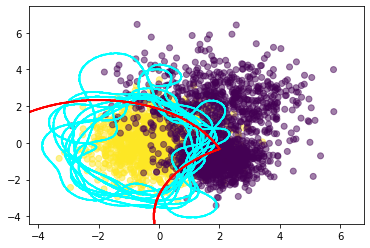

In [10]:
# Case when gamma = 1 

# Setting the hyper-parameter of our SVM model
N= 10
gamma=1.0

# plotting the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5)

# Training a list of SVM models and plot their decision boundaries
model_g_med = train(N, gamma)


#plotting decision boundaries of SVM models
plot_decision_boundary(model_g_med, X_test, 'cyan')

# Plotting the decision boundary of the Bayes predictor
plot_decision_boundary(b, X_test,'red')


Training models ...: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:00<00:00, 40.65it/s]


The mean accuracy: 0.7994333333333332 and its variance: 0.00028944555555555587


Plot decision boundaries ...: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 10.67it/s]


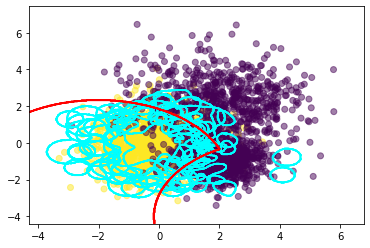

In [11]:
# gamma = 10
# Setting the hyper-parameter of our SVM model
N= 10
gamma=10.0

# plotting the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.5)

# Training a list of SVM models and plot their decision boundaries
model_g_hi = train(N, gamma)


#plotting decision boundaries of SVM models
plot_decision_boundary(model_g_hi, X_test, 'cyan')

# Plotting the decision boundary of the Bayes predictor
plot_decision_boundary(b, X_test,'red')


### 4.3 Conclusion (2 points)

What conclusion you can get from the models with different $\gamma$'s. Please answer the question from the perspectives of 

- the mean prediction accuracy
- the variance of prediction accuracy
- the pattern of the decision boundaries.

### In an SVM model, when using a radial basis function (RBF) kernel, the hyperparameter ùõæ controls the degree to which neighboring points exert influence on the classification of a given point. In an RBF kernel, the kernel function is a Gaussian and ùõæ is inversely proportional to the variance of the Gaussian distribution. In other words, when ùõæ is small the variance of the kernel function is large, which means that more points at a futher distance away are able to influence the classification of our point of interest. When ùõæ is large, the variance of our Gaussian function is small, and our model is more heavily influenced by the points closest to our point of interest. 
### We see the effects of varying ùõæ in this excercise. At low levels of gamma, seen here in the case when gamma = 0.01, we allow many point to influence the classification of our point of interest. As a result, the contribution that the variance in our training data plays in the error in our model is low and the error is mostly influenced by the bias in our model. Another way to say this would be to say that the complexity of our model is decreased. As gamma increases, we create more strict bounds on which points can influence the classification of our point of interest and our final model is more influenced by the training data. We see this as a small increase in test accuracy at gamma = 1, but a decrease in mean test accuracy at large values of gamma (here when gamma = 10). If we looked at the training accuracy, we would see a continual increase, as the model begins to overfit to the training data more and more. 
### Regarding the variance of the prediction accuracy- at low values of gamma, our model takes into acount more of the training points to classify our point of interest. As a result, our model has a low variance in prediction accuracy. Increasing gamma allows the variance in each our our training datasets to come through in the model. Thus, the variance in accuracy increases as gamma does. 
### Finally, we can clearly see the effects that varying gamma plays when visualizing our data and the decision boundaries given by our models as compared to the Naive Bayes Predictor. At low values of gamma, our decision boundaries have low degrees of complexity, appearing as parabolas that divide our positive predictions from our negative predictions. As we increase gamma, the decision boundaries become more complex. At gamma = 1.0, the decision boundaries now resemble continuous ovals containing the positive predictions. At gamma = 10, it is clear that our model has overfit the data, based on the many small decision boundaries that encircle points far outside the Bayes predictor's boundary. 